observer: "Market downturn occurred!"
observer: "Supplier delays increased costs!"
observer: "Supplier delays increased costs!"
observer: "Supplier delays increased costs!"
observer: "Market downturn occurred!"
observer: "Market downturn occurred!"
observer: "Market downturn occurred!"

Detailed Simulation Results (Selected Metrics):
+-------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
| Time Period |    Sales Volume    |      Revenue       |   Variable Costs   |  Inventory Level   | Accounts Receivable |  Accounts Payable  |
+-------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|     1.0     | 245.05181695712986 | 36757.77254356948  | 11762.487213942233 | 754.9481830428701  |  7351.554508713896  | 13861.450874799635 |
|     2.0     | 228.7668460075743  | 34315.026901136145 | 9150.673840302972  | 1026.18133703

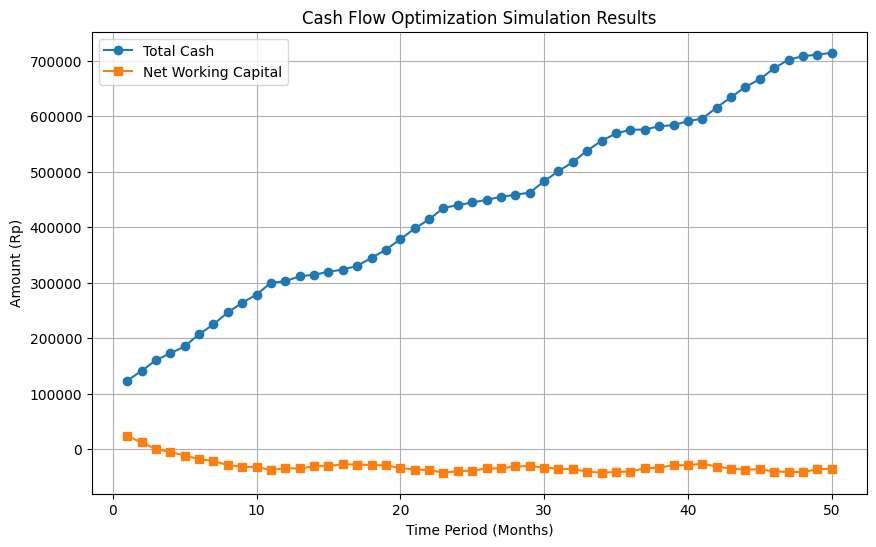

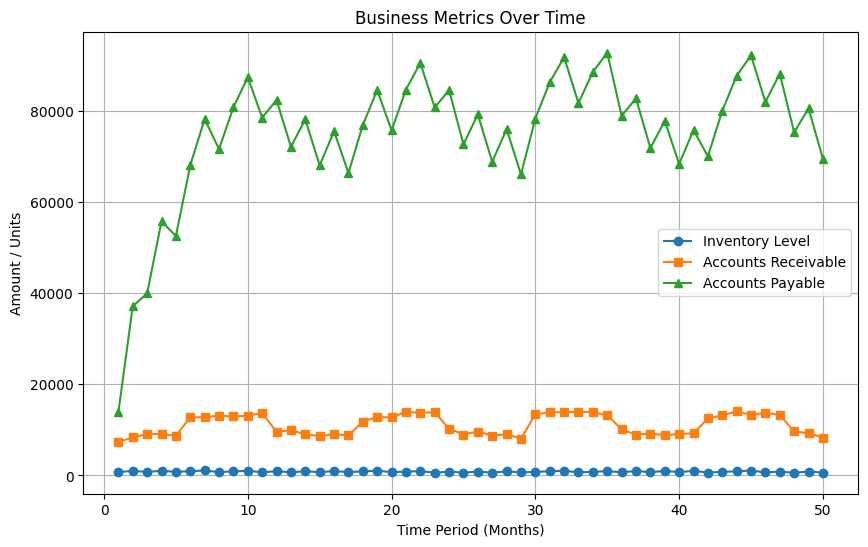

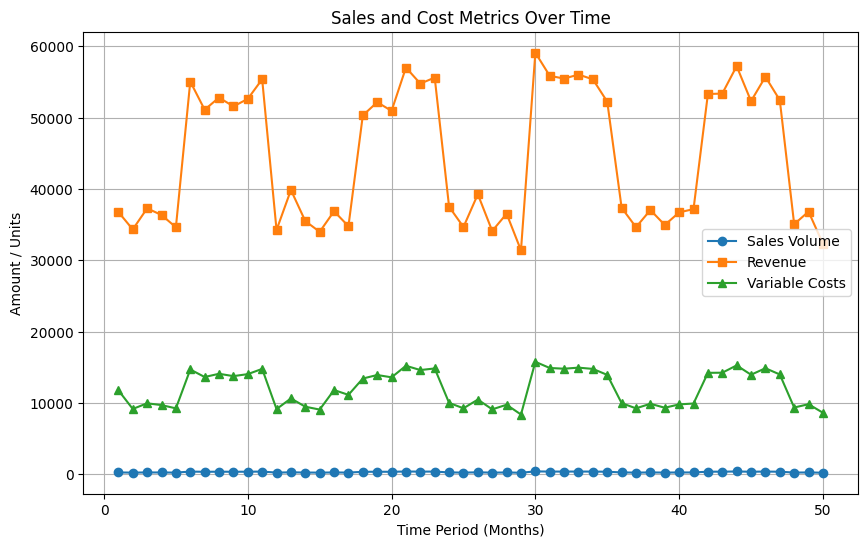

In [1]:
from tabulate import tabulate
import pynetlogo
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the NetLogo link
netlogo = pynetlogo.NetLogoLink(gui=False)

# Load the NetLogo model
netlogo.load_model('nlogo-models/cashflow-opt.nlogo')

# Set initial parameters
initial_parameters = {
    'initial-cash': 100000,
    'initial-net-working-capital': 50000,
    'fixed-costs': 10000,
    'sales-price': 150,
    'cost-per-unit': 40,
    'base-sales-volume': 300,
    'receivable-collection-rate': 0.8,
    'payable-payment-rate': 0.3,
    'initial-inventory-level': 1000,
    'reorder-threshold': 600,
    'reorder-amount': 500,
    'market-downturn-probability': 10,
    'supplier-delay-probability': 5
}

# Set model parameters
for param, value in initial_parameters.items():
    netlogo.command(f'set {param} {value}')

# Set up the model
netlogo.command('setup')

# Number of ticks to run
ticks = 50

# List to store results
results = []

# Run the simulation and collect data
for tick in range(ticks):
    netlogo.command('go')
    results.append({
        'Time Period': netlogo.report('time-period'),
        'Total Cash': netlogo.report('total-cash'),
        'Net Working Capital': netlogo.report('net-working-capital'),
        'Inventory Level': netlogo.report('first [inventory-level] of business-units'),
        'Accounts Receivable': netlogo.report('first [accounts-receivable] of business-units'),
        'Accounts Payable': netlogo.report('first [accounts-payable] of business-units'),
        'Sales Volume': netlogo.report('first [sales-volume] of business-units'),
        'Revenue': netlogo.report('first [revenue] of business-units'),
        'Variable Costs': netlogo.report('first [variable-costs] of business-units')
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Close the NetLogo workspace
netlogo.kill_workspace()

# Print the selected columns in tabular format
columns_to_print = ['Time Period', 'Sales Volume', 'Revenue', 'Variable Costs', 
                    'Inventory Level', 'Accounts Receivable', 'Accounts Payable']
table_data = results_df[columns_to_print]
print("\nDetailed Simulation Results (Selected Metrics):")
print(tabulate(table_data, headers='keys', tablefmt='pretty', showindex=False))

# Visualization

# Plot Total Cash and Net Working Capital
plt.figure(figsize=(10, 6))
plt.plot(results_df['Time Period'], results_df['Total Cash'], marker='o', label='Total Cash')
plt.plot(results_df['Time Period'], results_df['Net Working Capital'], marker='s', label='Net Working Capital')
plt.title('Cash Flow Optimization Simulation Results')
plt.xlabel('Time Period (Months)')
plt.ylabel('Amount (Rp)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Inventory Level, Accounts Receivable, and Accounts Payable
plt.figure(figsize=(10, 6))
plt.plot(results_df['Time Period'], results_df['Inventory Level'], marker='o', label='Inventory Level')
plt.plot(results_df['Time Period'], results_df['Accounts Receivable'], marker='s', label='Accounts Receivable')
plt.plot(results_df['Time Period'], results_df['Accounts Payable'], marker='^', label='Accounts Payable')
plt.title('Business Metrics Over Time')
plt.xlabel('Time Period (Months)')
plt.ylabel('Amount / Units')
plt.legend()
plt.grid(True)
plt.show()

# Plot Sales Volume, Revenue, and Variable Costs
plt.figure(figsize=(10, 6))
plt.plot(results_df['Time Period'], results_df['Sales Volume'], marker='o', label='Sales Volume')
plt.plot(results_df['Time Period'], results_df['Revenue'], marker='s', label='Revenue')
plt.plot(results_df['Time Period'], results_df['Variable Costs'], marker='^', label='Variable Costs')
plt.title('Sales and Cost Metrics Over Time')
plt.xlabel('Time Period (Months)')
plt.ylabel('Amount / Units')
plt.legend()
plt.grid(True)
plt.show()
